In [12]:
from __future__ import print_function, division

#%matplotlib inline

import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot

**Exercise 3.1** Something like the class size paradox appears if you survey
children and ask how many children are in their family. Families with many
children are more likely to appear in your sample, and families with no children have no chance to be in the sample.
Use the NSFG respondent variable NUMKDHH to construct the actual distribution for the number of children under 18 in the household.
Now compute the biased distribution we would see if we surveyed the children
and asked them how many children under 18 (including themselves) are in
their household.
Plot the actual and biased distributions, and compute their means.

In [4]:
resp = nsfg.ReadFemResp()

In [5]:
pmf = thinkstats2.Pmf(resp.numkdhh, label='numkdhh')

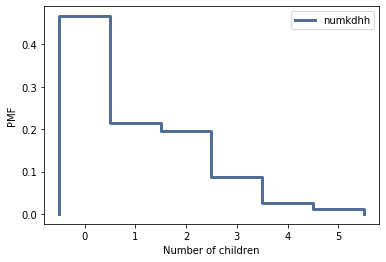

In [8]:
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Number of children', ylabel='PMF')

In [14]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

In [15]:
biased = BiasPmf(pmf, label='biased')

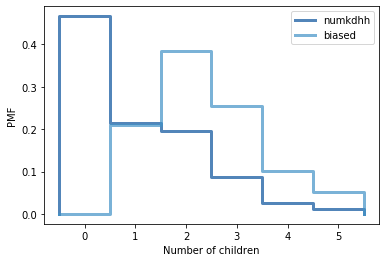

In [16]:
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased])
thinkplot.Config(xlabel='Number of children', ylabel='PMF')

In [17]:
pmf.Mean()

1.024205155043831

In [18]:
biased.Mean()

2.403679100664282

**Exercise 3.2** Write functions called PmfMean and PmfVar that take a Pmf object and compute the mean and variance. To test these methods, check that they are
consistent with the methods Mean and Var provided by Pmf.

In [19]:
def PmfMean(pmf):
    """Computes the mean of a PMF.

    Returns:
        float mean
    """
    mean = 0.0
    for x, p in pmf.d.items():
        mean += p * x
    return mean


In [20]:
def PmfVar(pmf, mu=None):
    """Computes the variance of a PMF.

    Args:
        mu: the point around which the variance is computed;
            if omitted, computes the mean

    Returns:
        float variance
    """
    if mu is None:
        mu = pmf.Mean()

    var = 0.0
    for x, p in pmf.d.items():
        var += p * (x - mu) ** 2
    return var

In [24]:
# test PmfMean and PmfVar
mean = PmfMean(pmf)
var = PmfVar(pmf)

assert mean == pmf.Mean(), "test failed"
print ("Test passed: Computed mean from function PmfMean and class method pmf.Mean are same")
assert var == pmf.Var(), "test failed"
print ("Test passed: Computed variance from function PmfVar and class method pmf.Var are same")

Test passed: Computed mean from function PmfMean and class method pmf.Mean are same
Test passed: Computed variance from function PmfVar and class method pmf.Var are same
